In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/generaldatasets/SystemAdministrators.csv
/kaggle/input/generaldatasets/sim_test.csv
/kaggle/input/generaldatasets/np.csv
/kaggle/input/generaldatasets/flying.csv
/kaggle/input/generaldatasets/growth.csv
/kaggle/input/generaldatasets/protein.csv
/kaggle/input/generaldatasets/CIACountries.csv
/kaggle/input/generaldatasets/vehicles.csv
/kaggle/input/generaldatasets/marathon_results_2017.csv
/kaggle/input/generaldatasets/ACS.csv
/kaggle/input/generaldatasets/WorldCities.csv
/kaggle/input/generaldatasets/Cereals.csv
/kaggle/input/generaldatasets/light.csv
/kaggle/input/generaldatasets/BreadBasket.csv
/kaggle/input/generaldatasets/complete.csv
/kaggle/input/generaldatasets/drinks.csv
/kaggle/input/generaldatasets/allbacks.csv
/kaggle/input/generaldatasets/global-superstore.xlsx
/kaggle/input/generaldatasets/HollywoodMovies.csv
/kaggle/input/generaldatasets/poly_news.csv
/kaggle/input/generaldatasets/MiamiHeat.csv
/kaggle/input/generaldatasets/presidentialElections.csv
/kaggle/i

In [2]:
import pandas as pd
df = pd.read_csv("../input/generaldatasets/Cereals.csv")
print(df.head())

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100%_Bran   N    C        70        4    1     130   10.0   
1          100%_Natural_Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   
4             Almond_Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0     6.0   280.0        25      3     1.0  0.33  68.402973  
1    8.0     8.0   135.0         0      3     1.0  1.00  33.983679  
2    7.0     5.0   320.0        25      3     1.0  0.33  59.425505  
3    8.0     0.0   330.0        25      3     1.0  0.50  93.704912  
4   14.0     8.0     NaN        25      3     1.0  0.75  34.384843  


1.Remove all cereals with missing values.
------------

In [3]:
df.isnull().sum()
df_drop = df.copy().dropna()
df_drop_name = df_drop["name"]
#dfdrop = df_drop[df_drop.columns.difference(['label'])]
print(df_drop)
print(df_drop_name)

                         name mfr type  calories  protein  fat  sodium  fiber  \
0                   100%_Bran   N    C        70        4    1     130   10.0   
1           100%_Natural_Bran   Q    C       120        3    5      15    2.0   
2                    All-Bran   K    C        70        4    1     260    9.0   
3   All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   
5     Apple_Cinnamon_Cheerios   G    C       110        2    2     180    1.5   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Trix   G    C       110        1    1     140    0.0   
74                 Wheat_Chex   R    C       100        3    1     230    3.0   
75                   Wheaties   G    C       100        3    1     200    3.0   
76        Wheaties_Honey_Gold   G    C       110        2    1     200    1.0   

    carbo  sugars  potass  

2.Apply hierarchical clustering to the data.
------------

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
#Prepossessing the data using PCA
df_drop = df_drop.iloc[:,3:]
X = df_drop
scaler = StandardScaler()
pca = PCA(n_components='mle', svd_solver='full')

pipeline=make_pipeline(scaler,pca)
X = pipeline.fit_transform(X)

print(X.shape)
print(pca.explained_variance_ratio_.sum())

(74, 12)
0.9999999999999999


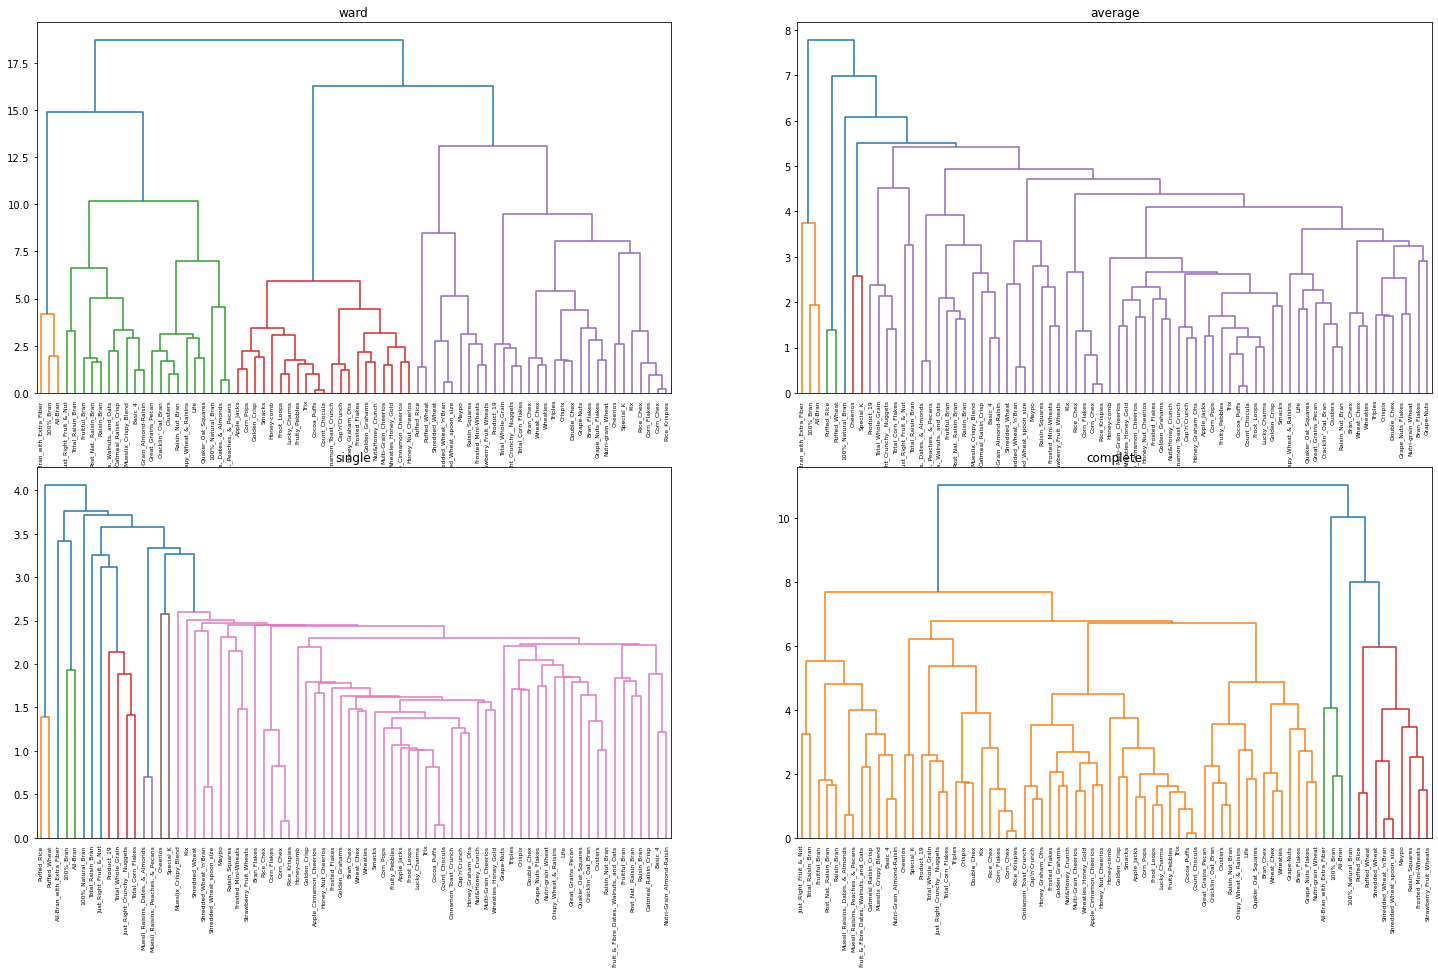

In [5]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
#Plot 4 kinds of hierarchical clustering
plt.figure(figsize=(25,15))
plt.subplot(221)
plt.title('ward')
Z_ward = linkage(X, 'ward')
P_ward = dendrogram(Z_ward, labels=df_drop_name.values)
plt.savefig("ward.svg", dpi=600,format="svg")

plt.subplot(222)
plt.title('average')
Z_average = linkage(X, 'average')
P_average = dendrogram(Z_average, labels=df_drop_name.values)
plt.savefig("average.svg", dpi=600,format="svg")

plt.subplot(223)
plt.title('single')
Z_single = linkage(X, 'single')
P_single = dendrogram(Z_single, labels=df_drop_name.values)
plt.savefig("single.svg", dpi=600,format="svg")

plt.subplot(224)
plt.title('complete')
Z_complete = linkage(X, 'complete')
P_complete = dendrogram(Z_complete, labels=df_drop_name.values)
plt.savefig("complete.svg", dpi=600,format="svg")

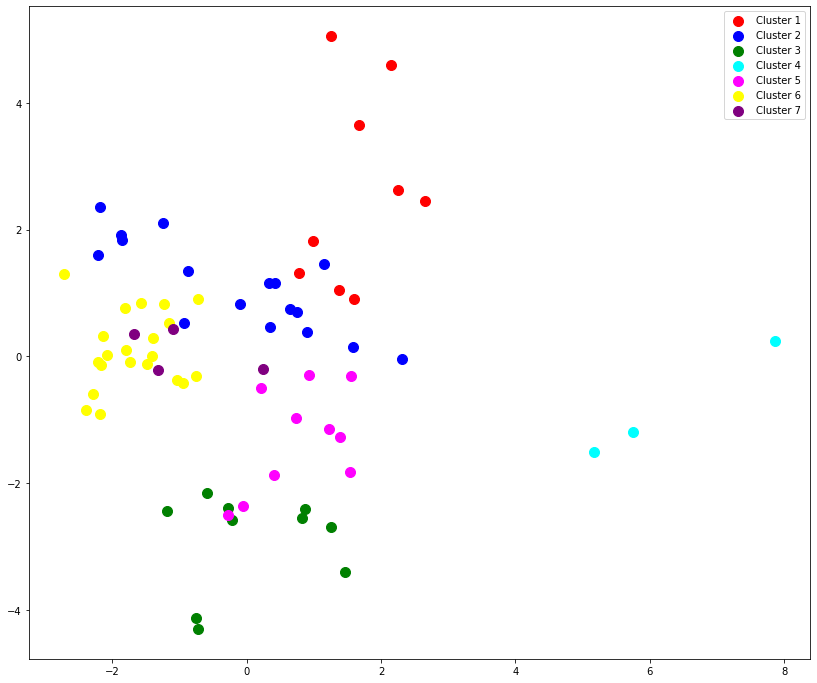

In [6]:
cluster_data = X
from sklearn.cluster import AgglomerativeClustering
Agg = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
y_data = Agg.fit_predict(cluster_data)
plt.figure(figsize=(14,12))
plt.scatter(cluster_data[y_data == 0, 0], cluster_data[y_data == 0, 1], s = 100, c = 'red', label = 'Cluster 1') # plotting cluster 1
plt.scatter(cluster_data[y_data == 1, 0], cluster_data[y_data == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') # plotting cluster 2
plt.scatter(cluster_data[y_data == 2, 0], cluster_data[y_data == 2, 1], s = 100, c = 'green', label = 'Cluster 3') # plotting cluster 3
plt.scatter(cluster_data[y_data == 3, 0], cluster_data[y_data == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  # plotting cluster 4
plt.scatter(cluster_data[y_data == 4, 0], cluster_data[y_data == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(cluster_data[y_data == 5, 0], cluster_data[y_data == 5, 1], s = 100, c = 'yellow', label = 'Cluster 6')
plt.scatter(cluster_data[y_data == 6, 0], cluster_data[y_data == 6, 1], s = 100, c = 'purple', label = 'Cluster 7')
plt.legend()
# show the plot
#plt.show()
plt.savefig("cluster.svg", dpi=600,format="svg")

Compare dendrograms from single linkage and complete linkage and look at the cluster centroids.
------------

In [7]:
F_single = fcluster(Z_single,3.2,criterion='distance')
F_complete = fcluster(Z_complete,6,criterion='distance')
df2 = pd.DataFrame(X)
df2['single'] = F_single
df2['complete'] = F_complete
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,single,complete
0,5.746995,-1.187545,-0.983893,0.421067,-1.176490,-0.972466,-0.223206,-0.243515,-0.135080,0.049433,0.250305,0.010701,2,6
1,0.411657,-1.869310,-2.901420,-0.858535,3.271532,-0.681940,-0.962611,0.903571,-0.841989,-0.594658,0.067248,-0.094692,9,8
2,5.167720,-1.504111,-0.102637,0.169396,-1.559672,-1.996801,0.415834,0.186687,0.140228,0.084262,-0.517210,-0.014985,2,6
3,7.856202,0.241896,0.676601,0.467311,-1.770340,-0.781378,-0.698801,0.869826,-0.685784,0.107987,0.738824,0.076199,3,6
4,-1.039034,-0.365354,-1.466490,-0.909753,-0.407840,-0.896077,-0.006820,-0.794098,-0.744350,-0.098973,0.099616,-0.080442,8,4


In [8]:
dfs = pd.DataFrame()
for i in range(1,8):
    dfs[i] = df2[df2['single'].isin([i])].iloc[:, 0:11].mean()
dfs = dfs.sort_values(by=0, axis=1)
print(dfs)

           4         5         6         7         1         2         3
0  -1.004160 -0.726746 -0.163613  0.386569  1.698801  5.457357  7.856202
1  -0.415668 -4.304607 -2.434123  0.811507  4.828156 -1.345828  0.241896
2   2.392838  2.031189 -0.108136  2.211757 -2.168147 -0.543265  0.676601
3   2.327480  1.382033 -0.784762 -2.294828  1.707591  0.295232  0.467311
4   0.428629 -1.077991  2.196372  1.003608  1.189411 -1.368081 -1.770340
5  -0.358205  0.921632  0.039364 -1.284258 -0.405016 -1.484634 -0.781378
6  -0.540340 -2.025826 -0.998862 -1.336927 -0.101707  0.096314 -0.698801
7  -0.696821 -0.048527  0.614306 -1.045289  0.698431 -0.028414  0.869826
8  -0.510839 -0.594205  0.236424  1.282439  0.519695  0.002574 -0.685784
9   0.049414 -0.278921  1.377721 -0.205838 -0.008137  0.066847  0.107987
10  0.034194 -0.483910 -0.156657  0.142176 -0.251666 -0.133453  0.738824


In [9]:
dfc = pd.DataFrame()
for i in range(1,8):
    dfc[i] = df2[df2['complete'].isin([i])].iloc[:, 0:11].mean()
dfc = dfc.sort_values(by=0, axis=1)
print(dfc)

           4         3         1         2         5         7         6
0  -1.674300 -1.258879  0.028438  0.386569  1.091402  1.632249  6.256972
1   0.095956  1.073377 -2.829053  0.811507 -0.126109  2.612734 -0.816587
2  -1.190772  1.837861  0.653352  2.211757 -0.068369 -0.560371 -0.136643
3  -0.093494  0.651087 -0.199056 -2.294828  0.006299  0.093469  0.352591
4  -0.606718  0.109073  0.096346  1.003608  0.326174  0.548597 -1.502167
5  -0.187991 -0.299509  0.668520 -1.284258 -0.251755  1.116151 -1.250215
6  -0.082237  0.239513 -0.156423 -1.336927  0.525337 -0.275799 -0.168724
7  -0.157783  0.253870  0.358463 -1.045289 -0.230815 -0.047683  0.270999
8  -0.019665 -0.089929  0.094550  1.282439  0.062416 -0.173176 -0.226878
9   0.029280  0.016878  0.059791 -0.205838 -0.019414 -0.055384  0.080561
10  0.063837 -0.023548 -0.057146  0.142176  0.020256 -0.164371  0.157306


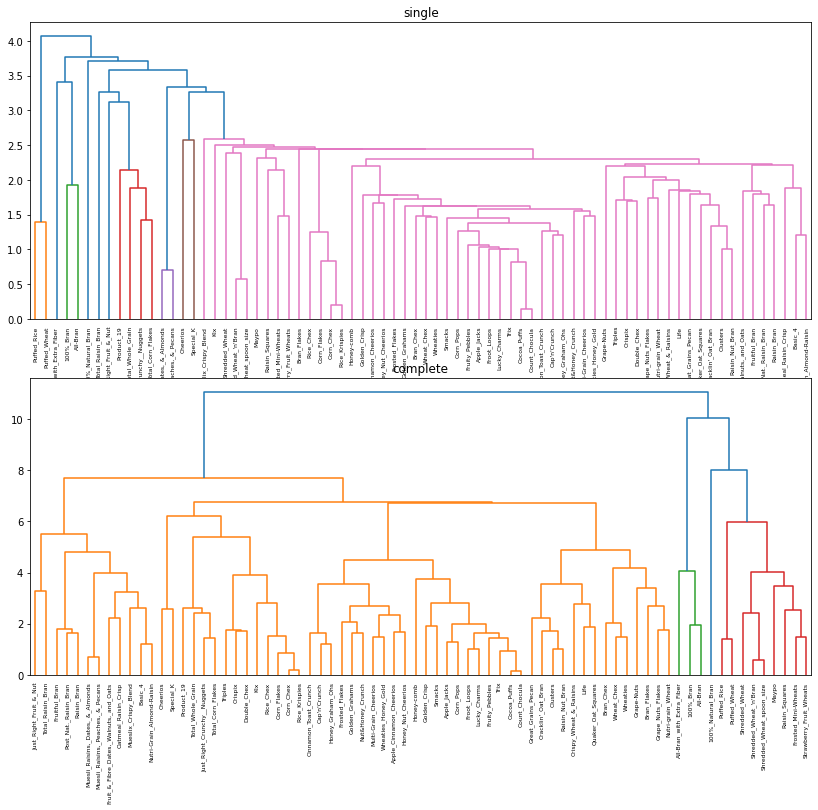

In [10]:
plt.figure(figsize=(14,12))
plt.subplot(211)
plt.title('single')
Z_single = linkage(X, 'single')
P_single = dendrogram(Z_single, labels=df_drop_name.values)
plt.subplot(212)
plt.title('complete')
Z_complete = linkage(X, 'complete')
P_complete = dendrogram(Z_complete, labels=df_drop_name.values)

From charts above, we can draw a con conclusion that the complex linkage is better than the simple one, because the single linkage seems to be easily infected by the extreme value while both the centroids of the single and the complex linkage are close.

How many clusters would you use?
------------

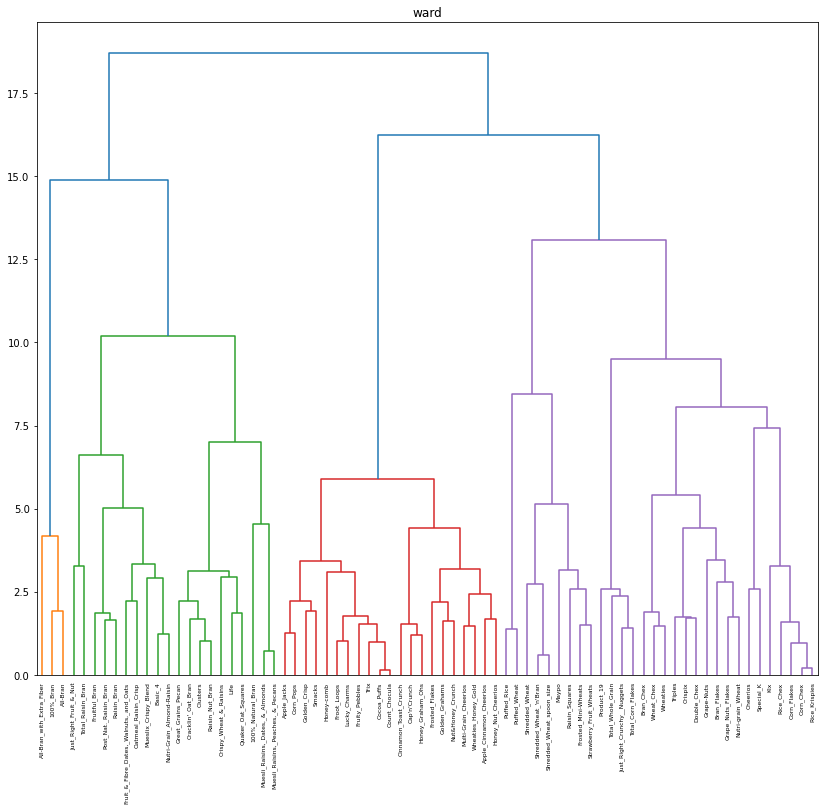

In [11]:
plt.figure(figsize=(14,12))
plt.title('ward')
Z_ward = linkage(X, 'ward')
P_ward = dendrogram(Z_ward, labels=df_drop_name.values)

According to the data (After PCA) cluster dendrogram and compare with other charts, we choose the ward linkage chart. Also, we can simply find out that the cluster of the data is 4. But when we take a closer look, cluster can be 4-7. Considering the distance, I prefer 6 or 7 because it is not so instinct while not overfitting.